Map has been saved as 'restaurant_map.html'. Open this file in your browser to see it.


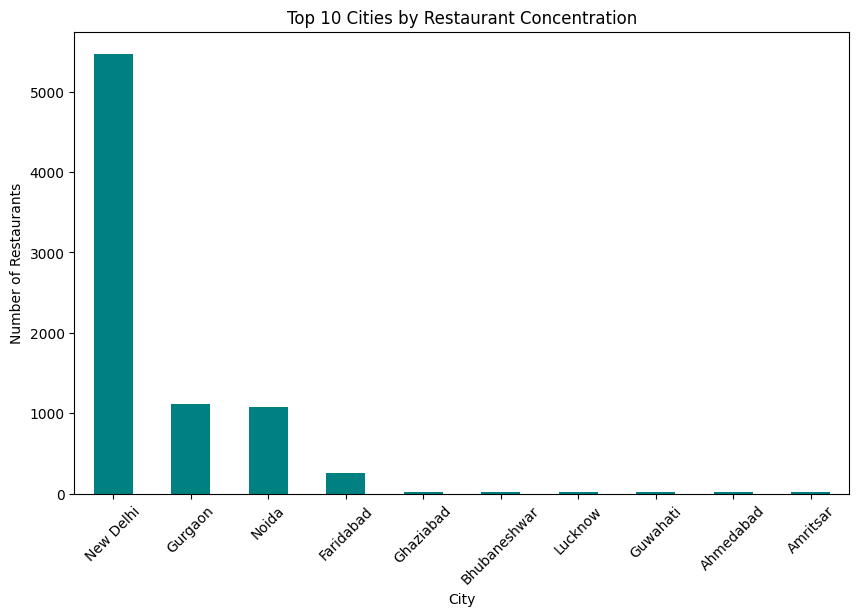


Top 10 Cities by Average Rating:
 City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Secunderabad        4.500000
Lincoln             4.500000
Name: Aggregate rating, dtype: float64

Top 10 Cities by Cuisine Diversity:
 City
New Delhi     892
Gurgaon       362
Noida         248
Faridabad      87
Ahmedabad      21
Cape Town      20
Coimbatore     20
Lucknow        20
Colombo        20
Sharjah        20
Name: Cuisines, dtype: int64


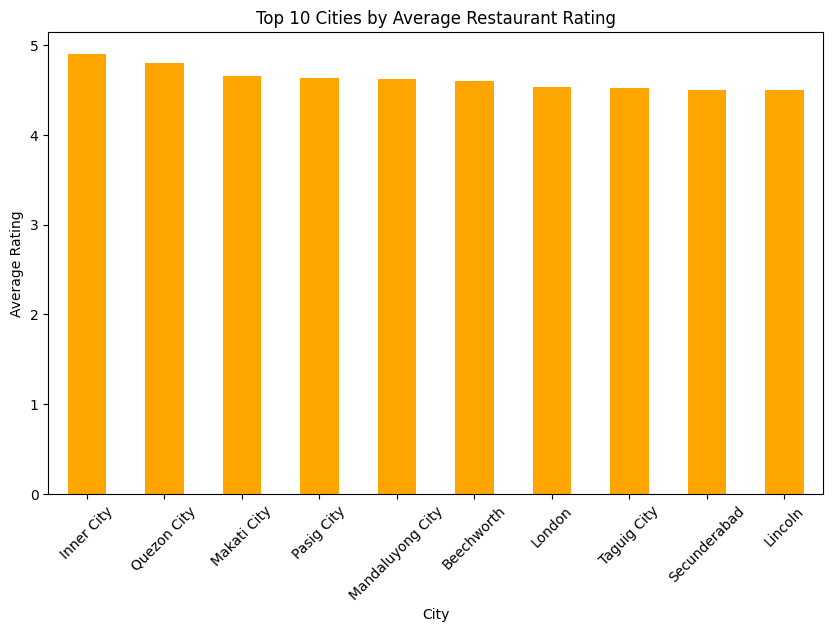

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# Step 1: Data Exploration and Loading
df = pd.read_csv('Dataset .csv')
df.columns = df.columns.str.strip()  # Removes hidden spaces

# Step 2: Visualize Distribution on a Map
# Using a MarkerCluster because plotting 9,000+ points individually will freeze your browser
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

# Add markers for a sample of 500 restaurants to keep the file size small and fast
for idx, row in df.sample(500).iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} - {row['City']}",
    ).add_to(marker_cluster)

m.save('restaurant_map.html')
print("Map has been saved as 'restaurant_map.html'. Open this file in your browser to see it.")

# Step 3: Group by City and Analyze Concentration
# Grouping by the correct column name 'City'
city_counts = df.groupby('City').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
city_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Cities by Restaurant Concentration')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Step 4: Calculate Statistics by City
# Average rating using the correct column name 'Aggregate rating'
avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Cuisine diversity: using 'Cuisines'
cuisine_diversity = df.groupby('City')['Cuisines'].nunique().sort_values(ascending=False)

# Price range statistics: using 'Price range'
avg_price = df.groupby('City')['Price range'].mean().sort_values(ascending=False)

print("\nTop 10 Cities by Average Rating:\n", avg_rating.head(10))
print("\nTop 10 Cities by Cuisine Diversity:\n", cuisine_diversity.head(10))

# Visualize average rating
plt.figure(figsize=(10, 6))
avg_rating.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()